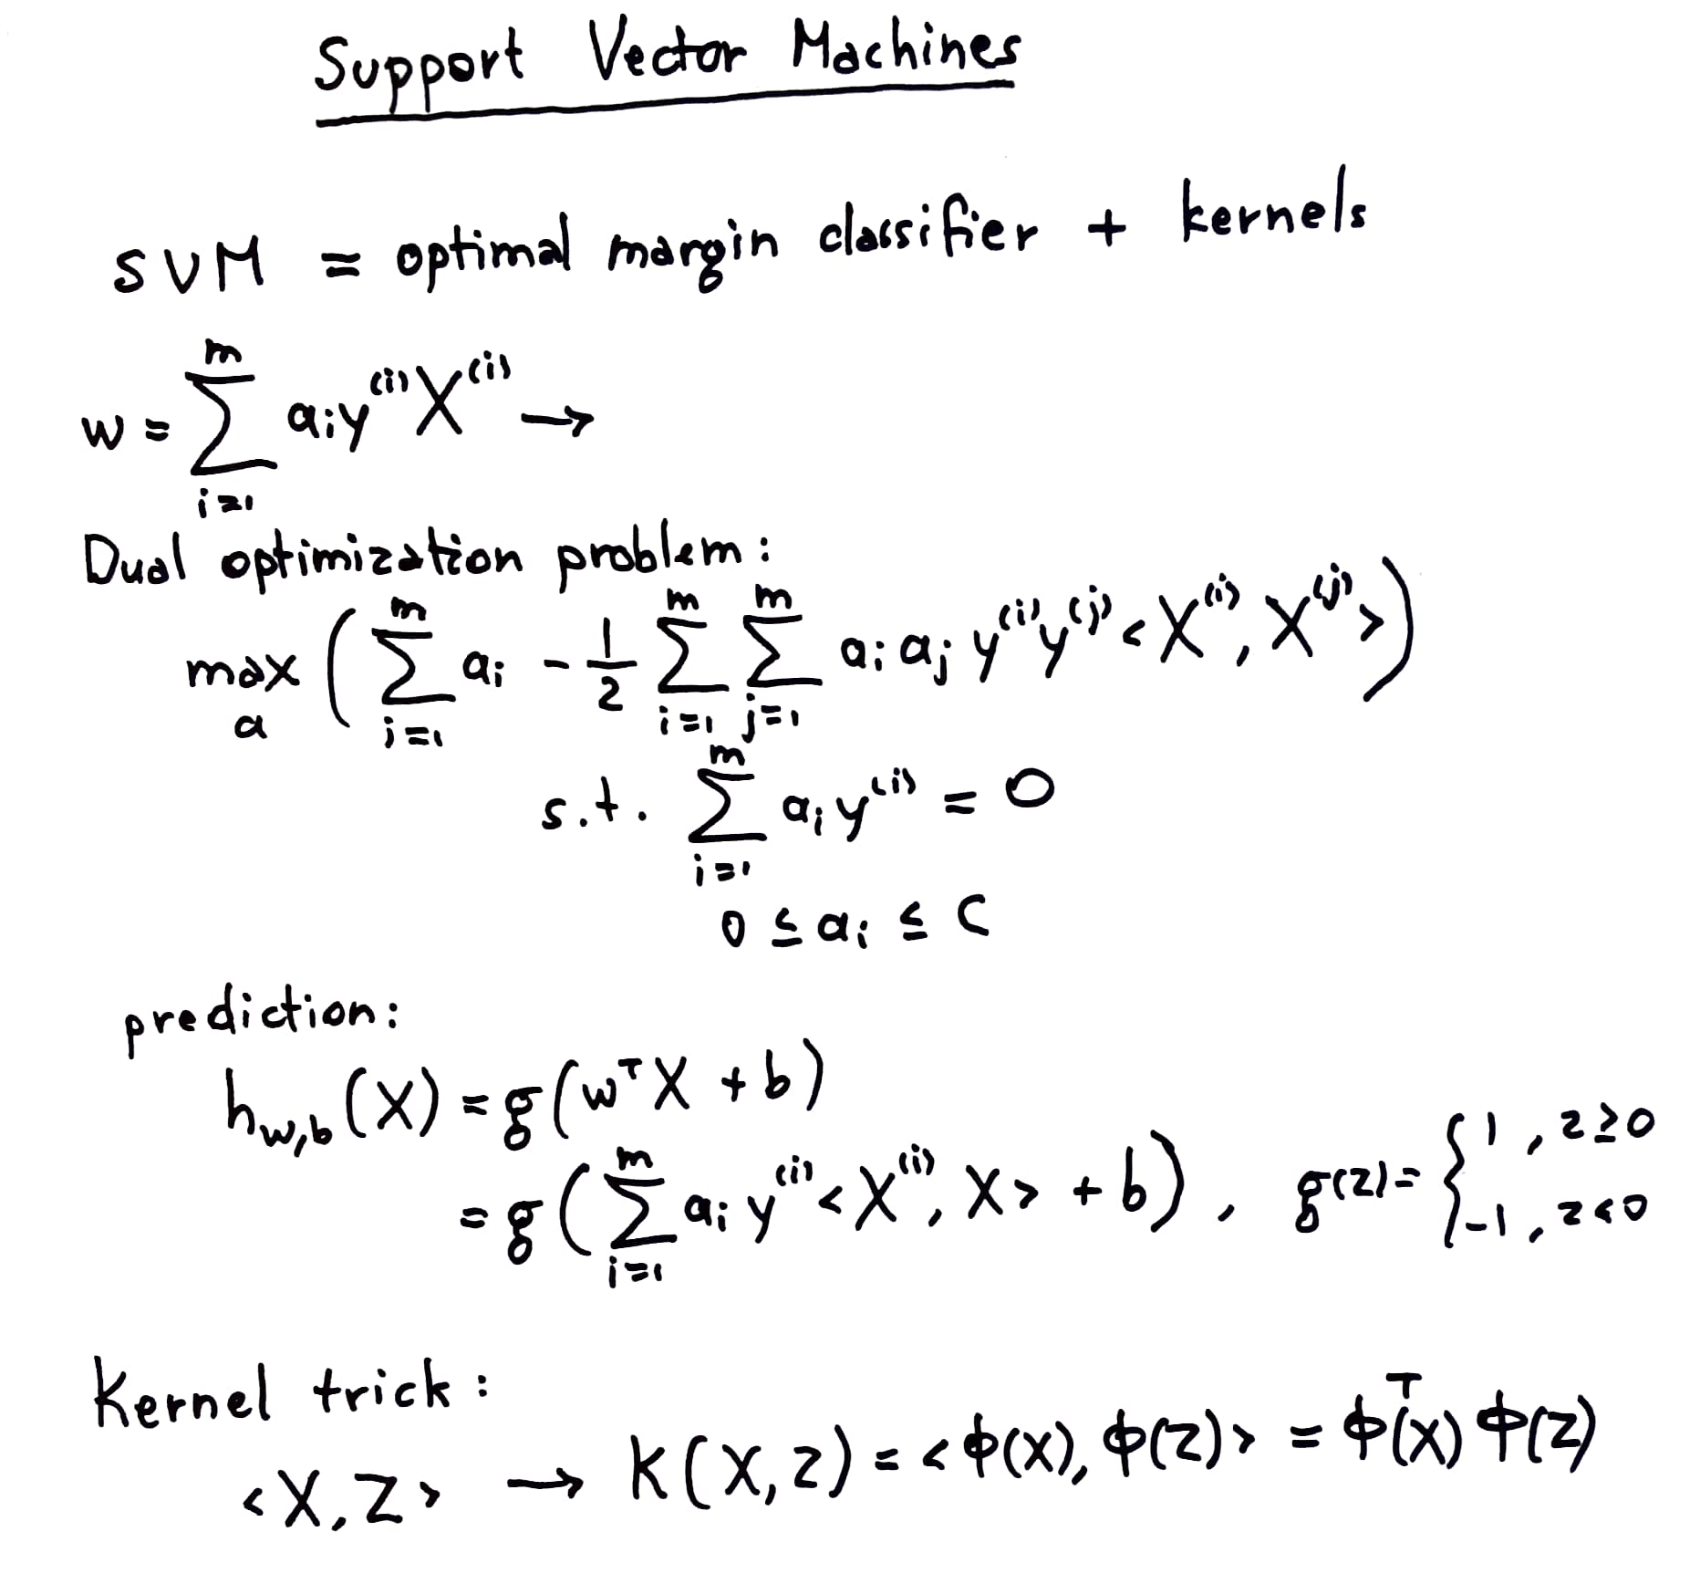

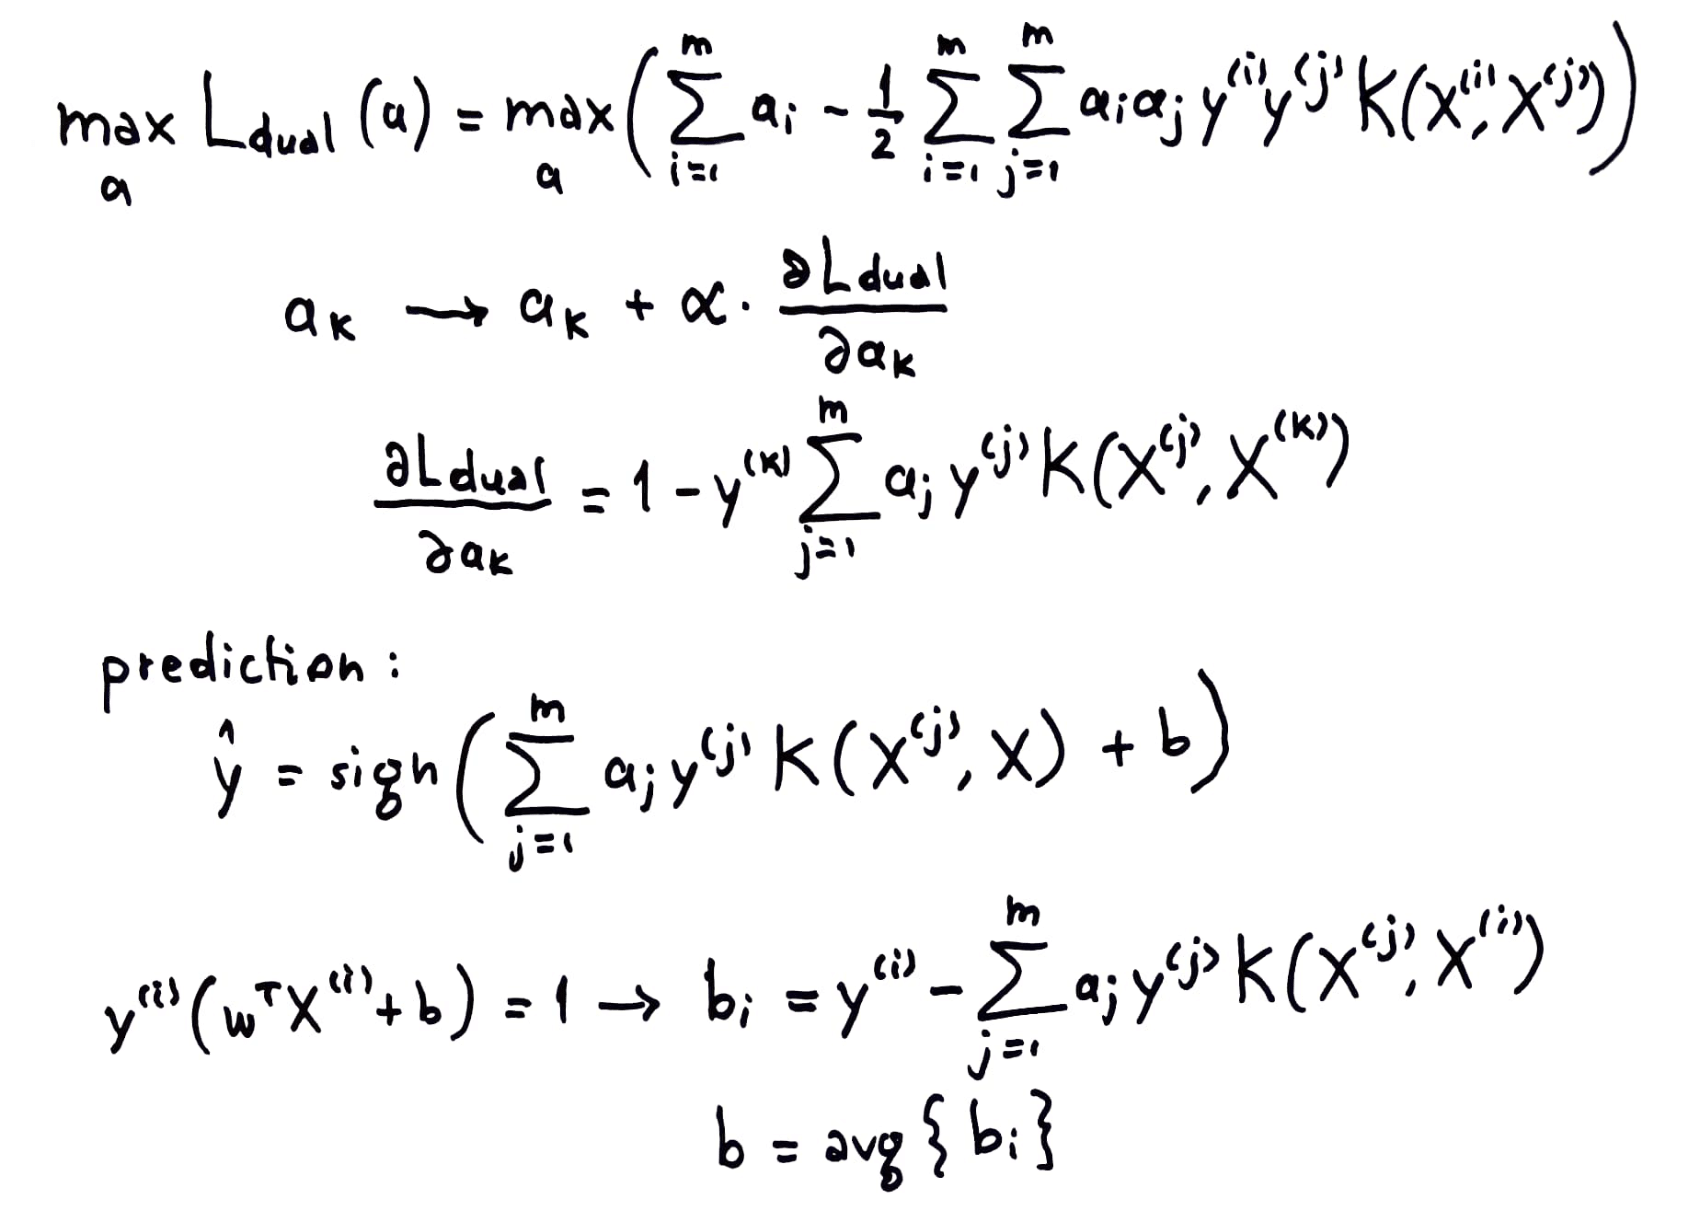

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [41]:
class SVMDual:
    
    def __init__(self, C=1.0, kernel='poly', degree=2, sigma=0.1):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.degree = degree
            self.c = 1
        elif kernel == 'rbf':
            self.kernel = self._gaussian_kernel
            self.sigma = sigma
        self.alpha = None
        self.b = 0
        self.ones = None
        
    def _polynomial_kernel(self, X, Z):
        return (self.c + X.dot(Z.T)) ** self.degree
    
    def _gaussian_kernel(self, X, Z):
        # np.linalg.norm(X1[:,np.newaxis] - X2[np.newaxis,:],axis=2) - computes the Euclidean
        #         distances between vectors in X1 and X2
        # X1[:,np.newaxis] - adds a new axis to X1 along the second dimension, reshaping it into
        #                    a column vector
        # X2[np.newaxis,:] - adds a new axis to X2 along the first dimension, reshaping it into a
        #                    row vector
        return np.exp(-(1/self.sigma ** 2) * np.linalg.norm(X[:,np.newaxis] - Z[np.newaxis,:],
                                                            axis=2) ** 2)
    
    def train(self, X, y, lr=1e-3, epochs=1000):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0])
        # np.outer() - computer the outer product of two vectors
        #    vectors a, b of length M, N:
        #       [[a0*b0 a0*b1 ... a0*bN-1]
        #            ...
        #       [aM-1*b0 aM-1*b1 ... aM-1*bN-1]]
        # (m,m) = (m,m) * (m,m)
        sum_y_iy_jK_ij = np.outer(y,y) * self.kernel(X,X)
        losses = []
        for _ in range(epochs):
            gradient = self.ones - sum_y_iy_jK_ij.dot(self.alpha)
            self.alpha = self.alpha + lr * gradient
            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0
            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha,self.alpha)
                                                    * sum_y_iy_jK_ij) 
            losses.append(loss)
        index = np.where((self.alpha > 0) & (self.alpha < self.C))[0]
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X,X[index]))
        self.b = np.mean(b_i)
        plt.plot(losses)
        plt.title('loss per epoch')
        plt.show()
        
    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X,X)) + self.b
    
    def predict(self, X):
        return np.sign(self._decision_function(X))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)
    
    def plot(self):
        plt.scatter(self.X[:,0], self.X[:,1], c=self.y, s=50, alpha=0.5, cmap='winter')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        XX, YY = np.meshgrid(xx, yy)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self._decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1,0,1], linestyles=['--','-','--'], colors=['k','k','k'])
        ax.scatter(self.X[:,0][self.alpha > 0], self.X[:,1][self.alpha > 0], s=50, linewidth=1,
                  facecolors='none', edgecolors='k')
        plt.show()

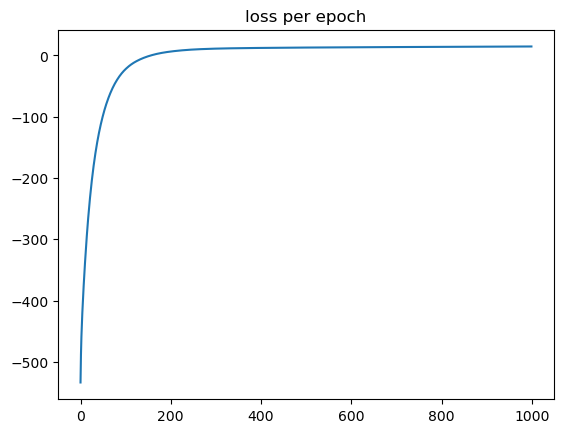

In [42]:
# datasets.make_circles() - make a large circle containing a smaller circle in 2d
#    factor - scale factor between inner and outer circles in the range [0,1)
#    noise - standard deviation of Gaussian noise added to the data
X1, y1 = datasets.make_circles(n_samples=300, factor=0.5, noise=0.05)
y1 = np.where(y1 <= 0, -1, 1)
svm1 = SVMDual(C=1.0, kernel='poly', degree=2)
svm1.train(X1, y1)

In [43]:
print('train score: ', svm1.score(X1, y1))

train score:  1.0


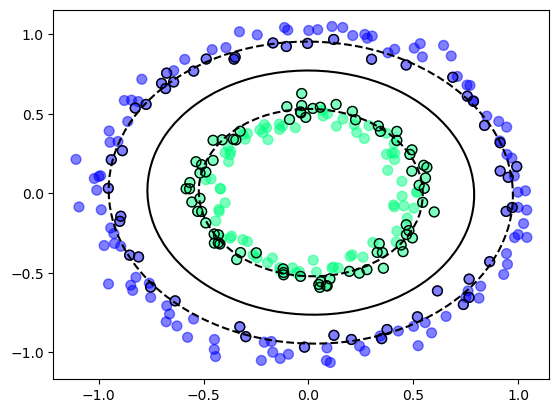

In [44]:
svm1.plot()

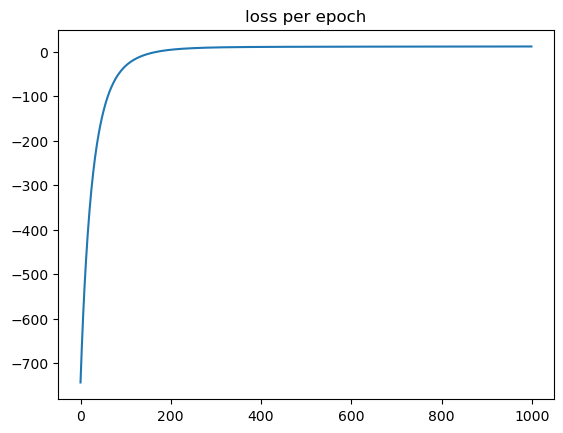

In [45]:
X2, y2 = datasets.make_moons(n_samples=400, noise=0.05)
y2 = np.where(y2 <= 0, -1, 1)
svm2 = SVMDual(C=1.0, kernel='rbf', sigma=0.2)
svm2.train(X2, y2)

In [46]:
print('train score: ', svm2.score(X2, y2))

train score:  1.0


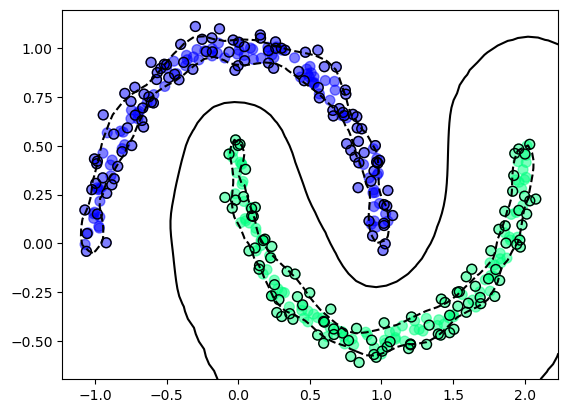

In [47]:
svm2.plot()